# 배달

### - 문제 설명

N개의 마을로 이루어진 나라가 있습니다. 이 나라의 각 마을에는 1부터 N까지의 번호가 각각 하나씩 부여되어 있습니다. 각 마을은 양방향으로 통행할 수 있는 도로로 연결되어 있는데, 서로 다른 마을 간에 이동할 때는 이 도로를 지나야 합니다. 도로를 지날 때 걸리는 시간은 도로별로 다릅니다. 현재 1번 마을에 있는 음식점에서 각 마을로 음식 배달을 하려고 합니다. 각 마을로부터 음식 주문을 받으려고 하는데, N개의 마을 중에서 K 시간 이하로 배달이 가능한 마을에서만 주문을 받으려고 합니다. 다음은 N = 5, K = 3인 경우의 예시입니다.

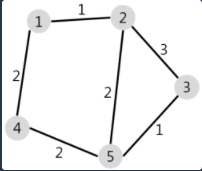

위 그림에서 1번 마을에 있는 음식점은 [1, 2, 4, 5] 번 마을까지는 3 이하의 시간에 배달할 수 있습니다. 그러나 3번 마을까지는 3시간 이내로 배달할 수 있는 경로가 없으므로 3번 마을에서는 주문을 받지 않습니다. 따라서 1번 마을에 있는 음식점이 배달 주문을 받을 수 있는 마을은 4개가 됩니다.
마을의 개수 N, 각 마을을 연결하는 도로의 정보 road, 음식 배달이 가능한 시간 K가 매개변수로 주어질 때, 음식 주문을 받을 수 있는 마을의 개수를 return 하도록 solution 함수를 완성해주세요.

### - 제한사항

* 마을의 개수 N은 1 이상 50 이하의 자연수입니다.
* road의 길이(도로 정보의 개수)는 1 이상 2,000 이하입니다.
* road의 각 원소는 마을을 연결하고 있는 각 도로의 정보를 나타냅니다.
* road는 길이가 3인 배열이며, 순서대로 (a, b, c)를 나타냅니다.
    * a, b(1 ≤ a, b ≤ N, a != b)는 도로가 연결하는 두 마을의 번호이며, c(1 ≤ c ≤ 10,000, c는 자연수)는 도로를 지나는데 걸리는 시간입니다.
    * 두 마을 a, b를 연결하는 도로는 여러 개가 있을 수 있습니다.
    * 한 도로의 정보가 여러 번 중복해서 주어지지 않습니다.
* K는 음식 배달이 가능한 시간을 나타내며, 1 이상 500,000 이하입니다.
* 임의의 두 마을간에 항상 이동 가능한 경로가 존재합니다.
* 1번 마을에 있는 음식점이 K 이하의 시간에 배달이 가능한 마을의 개수를 return 하면 됩니다.

### - 입출력 예

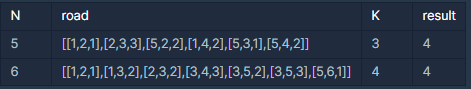

### - 입출력 예 설명

* 입출력 예 #1
    * 문제의 예시와 같습니다.

* 입출력 예 #2
    * 주어진 마을과 도로의 모양은 아래 그림과 같습니다.
    * 1번 마을에서 배달에 4시간 이하가 걸리는 마을은 [1, 2, 3, 5] 4개이므로 4를 return 합니다.

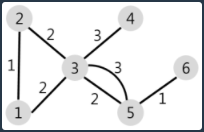



일반적인 다익스트라 알고리즘을 사용하여 1번에서 각 지역으로 이동할 때 걸리는 최단 시간을 구한 후, K 이하인 지역들의 수를 계산.

In [1]:
import heapq

def solution(N, road, K):
    graph = [[] for _ in range(N+1)]
    for a, b, d in road:
        graph[a].append((d, b))
        graph[b].append((d, a))

    def dijkstra():
        queue = []
        heapq.heappush(queue, (0, 1)) # 1번에서의 최단 시간
        dist = [1e9 for _ in range(N+1)]
        dist[1] = 0
        while queue:
            now_d, now_n = heapq.heappop(queue)
            if dist[now_n] < now_d: continue
            for next_d, next_n in graph[now_n]:
                next_d += now_d
                if next_d < dist[next_n]:
                    dist[next_n] = next_d
                    heapq.heappush(queue, (next_d, next_n))
        return dist

    return len([i for i in dijkstra() if i <= K])

In [2]:
print(solution(5, [[1, 2, 1], [2, 3, 3], [5, 2, 2], [1, 4, 2], [5, 3, 1], [5, 4, 2]], 3))
print(solution(6, [[1, 2, 1], [1, 3, 2], [2, 3, 2], [3, 4, 3], [3, 5, 2], [3, 5, 3], [5, 6, 1]], 4))

4
4


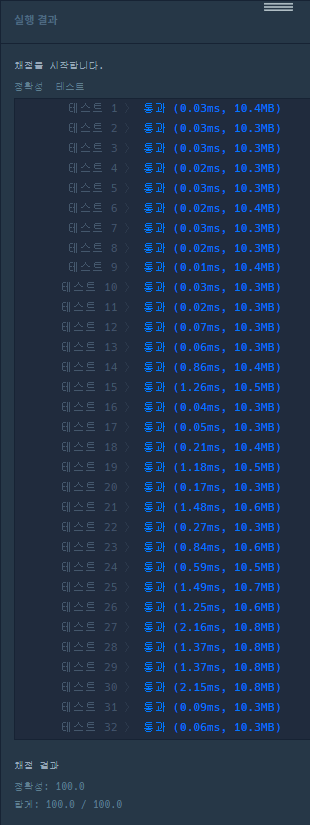